# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import datetime
import os

We set the random seed so that the results don't vary drastically.

In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)
import keras
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [16]:
train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Project_data/val.csv').readlines())
batch_size = 12#experiment with the batch size

In [17]:
len(train_doc)

663

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [18]:
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #img_idx = list(range(0, 30, 2)) #create a list of image numbers you want to use for a particular video
    img_idx = [4,5,6,15,16,17,27,28,29]
    x = len(img_idx)
    y = 120
    z = 120
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                imgs.sort(reverse=True)
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    image_resize = imresize(image, (y, z))
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    batch_data[folder,idx,:,:,0] = (image_resize[:,:,0] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (image_resize[:,:,1] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (image_resize[:,:,2] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        for folder_extra in range(batch_size):
            imgs = os.listdir(source_path+'/'+ t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].split(';')[0])
            imgs.sort(reverse=True)
            for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    image_resize = imresize(image, (y, z))
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    batch_data[folder,idx,:,:,0] = (image_resize[:,:,0] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (image_resize[:,:,1] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (image_resize[:,:,2] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    
            batch_labels[folder_extra, int( t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
            


In [ ]:
def generator1(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #img_idx = list(range(0, 30, 2)) #create a list of image numbers you want to use for a particular video
    img_idx = [4,5,6,15,27,28,29]
    x = len(img_idx)
    y = 120
    z = 120
    
    t = folder_list#np.random.permutation(folder_list)
    num_batches = len(folder_list)//batch_size # calculate the number of batches
    for batch in range(num_batches): # we iterate over the number of batches
        batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
        batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
        for folder in range(batch_size): # iterate over the batch_size
            imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
            imgs.sort(reverse=True)
            for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                image_resize = imresize(image, (y, z))
                #crop the images and resize them. Note that the images are of 2 different shape 
                #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                batch_data[folder,idx,:,:,0] = (image_resize[:,:,0] - image_resize[:,:,0].mean())/image_resize[:,:,0].std()#normalise and feed in the image
                batch_data[folder,idx,:,:,1] = (image_resize[:,:,1] - image_resize[:,:,1].mean())/image_resize[:,:,1].std()#normalise and feed in the image
                batch_data[folder,idx,:,:,2] = (image_resize[:,:,2] - image_resize[:,:,2].mean())/image_resize[:,:,2].std()#normalise and feed in the image
                    
            batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
    # write the code for the remaining data points which are left after full batches
    for folder_extra in range(batch_size):
        imgs = os.listdir(source_path+'/'+ t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].split(';')[0])
        imgs.sort(reverse=True)
        for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                image = imread(source_path+'/'+ t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                image_resize = imresize(image, (y, z))
                #crop the images and resize them. Note that the images are of 2 different shape 
                #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                batch_data[folder,idx,:,:,0] = (image_resize[:,:,0] - image_resize[:,:,0].mean())/image_resize[:,:,0].std()#normalise and feed in the image
                batch_data[folder,idx,:,:,1] = (image_resize[:,:,1] - image_resize[:,:,1].mean())/image_resize[:,:,1].std()#normalise and feed in the image
                batch_data[folder,idx,:,:,2] = (image_resize[:,:,2] - image_resize[:,:,2].mean())/image_resize[:,:,2].std()#normalise and feed in the image
                
        batch_labels[folder_extra, int( t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[2])] = 1
    yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
            


In [ ]:
next(train_generator)

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [19]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 20# choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 20


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [65]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
batch_size = 12
x = 9
y = 120
z = 120
no_classes = 5
#write your model here
#Model 1 using 2 con3d layers, 2 maxpool 3d and 2 fully connected
#Result: There seems to be overfitting as the validation loss is increasing while train loss is increasing
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2,2,2)))
#model.add(Dropout(0.2))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Dropout(0.2))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [66]:
learning_rate = 0.001
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_37 (Conv3D)           (None, 9, 120, 120, 16)   1312      
_________________________________________________________________
batch_normalization_36 (Batc (None, 9, 120, 120, 16)   64        
_________________________________________________________________
activation_36 (Activation)   (None, 9, 120, 120, 16)   0         
_________________________________________________________________
max_pooling3d_37 (MaxPooling (None, 4, 60, 60, 16)     0         
_________________________________________________________________
conv3d_38 (Conv3D)           (None, 4, 60, 60, 32)     13856     
_________________________________________________________________
batch_normalization_37 (Batc (None, 4, 60, 60, 32)     128       
_________________________________________________________________
activation_37 (Activation)   (None, 4, 60, 60, 32)     0         
__________

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [67]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [68]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [69]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [70]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val Source path =  Project_data/train ; batch size = 12
; batch size = 12
Epoch 1/40
56/56 [==============================] - 33s 581ms/step - loss: 1.8684 - categorical_accuracy: 0.2887 - val_loss: 1.7703 - val_categorical_accuracy: 0.3704

Epoch 00001: val_categorical_accuracy improved from -inf to 0.37037, saving model to model_init_2019-12-2208_10_00.874162/model-00001-1.86840-0.28869-1.77034-0.37037.h5
Epoch 2/40
56/56 [==============================] - 27s 487ms/step - loss: 1.3812 - categorical_accuracy: 0.4673 - val_loss: 1.5738 - val_categorical_accuracy: 0.5093

Epoch 00002: val_categorical_accuracy improved from 0.37037 to 0.50926, saving model to model_init_2019-12-2208_10_00.874162/model-00002-1.38120-0.46726-1.57384-0.50926.h5
Epoch 3/40
56/56 [==============================] - 30s 531ms/step - loss: 1.0678 - categorical_accuracy: 0.6116 - val_loss: 1.2285 - val_categorical_accuracy: 0.6111

Epoch 00003: val_categorical_accuracy improved from 0

56/56 [==============================] - 30s 530ms/step - loss: 0.3829 - categorical_accuracy: 0.8988 - val_loss: 1.1150 - val_categorical_accuracy: 0.7407

Epoch 00030: val_categorical_accuracy did not improve from 0.83333

Epoch 00030: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 31/40
56/56 [==============================] - 30s 531ms/step - loss: 0.3391 - categorical_accuracy: 0.9271 - val_loss: 0.9053 - val_categorical_accuracy: 0.8333

Epoch 00031: val_categorical_accuracy did not improve from 0.83333
Epoch 32/40
56/56 [==============================] - 30s 534ms/step - loss: 0.3558 - categorical_accuracy: 0.9063 - val_loss: 1.3410 - val_categorical_accuracy: 0.7778

Epoch 00032: val_categorical_accuracy did not improve from 0.83333
Epoch 33/40
56/56 [==============================] - 30s 532ms/step - loss: 0.3848 - categorical_accuracy: 0.8973 - val_loss: 1.4591 - val_categorical_accuracy: 0.7963

Epoch 00033: val_categorical_accuracy did not improve f

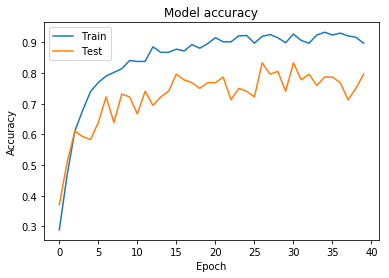

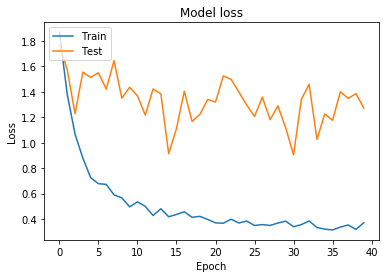

In [71]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_generator = generator1(val_path, val_doc, batch_size)

In [ ]:

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

predictions = model.predict_generator(test_generator, steps=validation_steps)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
final = predicted_classes[0:96]

In [ ]:
i = 0
final = np.empty((0,48), int)
for x in test_generator:
    print('hello' + str(i))
    
    true_label = x[1]
    true_class = np.argmax(true_label, axis=1)
    if i==0:
        temp = true_class
    else:
        test = np.append(temp, true_class)
    
    i = i+1
    

In [ ]:
len(test)

In [ ]:
len(final)

In [ ]:
from sklearn import metrics
report = metrics.classification_report(test, final)
print(report)    

In [ ]:
from matplotlib import pyplot
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

In [42]:
def generator_rnn(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #img_idx = list(range(0, 30, 2)) #create a list of image numbers you want to use for a particular video
    img_idx = [4,5,15,16,27,28]
    x = len(img_idx)
    y = 128
    z = 128
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                imgs.sort(reverse=True)
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    image_resize = imresize(image, (y, z))
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    batch_data[folder,idx,:,:,0] = (image_resize[:,:,0] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (image_resize[:,:,1] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (image_resize[:,:,2] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        for folder_extra in range(batch_size):
            imgs = os.listdir(source_path+'/'+ t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].split(';')[0])
            imgs.sort(reverse=True)
            for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    image_resize = imresize(image, (y, z))
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    batch_data[folder,idx,:,:,0] = (image_resize[:,:,0] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (image_resize[:,:,1] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (image_resize[:,:,2] - image_resize.mean())/image_resize.std()#normalise and feed in the image
                    
            batch_labels[folder_extra, int( t[(folder_extra + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
            


In [72]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 30# choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


In [73]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from keras.applications import mobilenet_v2
from keras import optimizers
batch_size = 12
x = 6
y = 128
z = 128
no_classes = 5
#write your model here
#Model 1 using 2 con3d layers, 2 maxpool 3d and 2 fully connected
#Result: There seems to be overfitting as the validation loss is increasing while train loss is increasing

mobile_net = keras.applications.mobilenet.MobileNet(include_top = False, weights='imagenet',input_shape=(128, 128, 3))


model = Sequential()

model.add(
            TimeDistributed(mobile_net, input_shape = (6,128,128,3)))

model.add(TimeDistributed(Flatten()))

model.add(GRU(16, activation='relu',return_sequences=False))

model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

In [74]:
learning_rate = 0.001
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_19 (TimeDis (None, 6, 4, 4, 1024)     3228864   
_________________________________________________________________
time_distributed_20 (TimeDis (None, 6, 16384)          0         
_________________________________________________________________
gru_10 (GRU)                 (None, 16)                787248    
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
batch_normalization_10 (Batc (None, 16)                64        
_________________________________________________________________
activation_10 (Activation)   (None, 16)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
__________

In [75]:
train_generator = generator_rnn(train_path, train_doc, batch_size)
val_generator = generator_rnn(val_path, val_doc, batch_size)

In [76]:
model_name = 'model_init_rnn' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [77]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [78]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = Source path =  Project_data/train ; batch size = 12
Epoch 1/30
12
56/56 [==============================] - 35s 617ms/step - loss: 1.7282 - categorical_accuracy: 0.3095 - val_loss: 1.9623 - val_categorical_accuracy: 0.4537

Epoch 00001: val_categorical_accuracy improved from -inf to 0.45370, saving model to model_init_rnn_2019-12-2213_51_53.907517/model-00001-1.72824-0.30952-1.96231-0.45370.h5
Epoch 2/30
56/56 [==============================] - 18s 323ms/step - loss: 1.2278 - categorical_accuracy: 0.5015 - val_loss: 1.4267 - val_categorical_accuracy: 0.6944

Epoch 00002: val_categorical_accuracy improved from 0.45370 to 0.69444, saving model to model_init_rnn_2019-12-2213_51_53.907517/model-00002-1.22777-0.50149-1.42668-0.69444.h5
Epoch 3/30
56/56 [==============================] - 22s 390ms/step - loss: 1.0724 - categorical_accuracy: 0.5997 - val_loss: 1.2905 - val_categorical_accuracy: 0.7593

Epoch 00003: val_categorical_accuracy improve

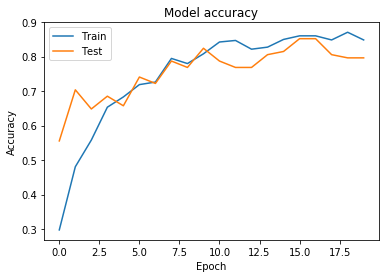

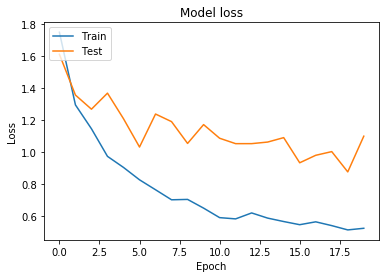

In [71]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()